<a href="https://colab.research.google.com/github/AnkitaSinha98/DeepLearningProgram/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANKITA SINHA 20MCI0003
### EXPERIMENT
Implement convolutional autoencoders to reconstruct the image from the noisy image.

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import DataLoader

In [2]:
train = datasets.MNIST(root='', train=True, download=True, transform=transforms.ToTensor())
test = datasets.MNIST(root='', train=False, download=False, transform=transforms.ToTensor())


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [3]:
trainloader = DataLoader(dataset = train,batch_size=128,shuffle=True)
testloader = DataLoader(dataset = test, batch_size = 8, shuffle=False)

In [4]:
class Autoencoder(nn.Module):
    def __init__(self, in_features = 784, out_features = 784, encoded_size=32):
        super(Autoencoder, self).__init__()
        self.autoencoder = nn.Sequential(nn.Linear(in_features,encoded_size),
                                        nn.ReLU(),
                                        nn.Linear(encoded_size, out_features), 
                                        nn.Sigmoid())
    def forward(self, x):
        x = self.autoencoder(x)
        return x

In [5]:
autoencoder = Autoencoder(encoded_size=50)
criterion = nn.BCELoss()
opt = torch.optim.Adam(params=autoencoder.parameters(), lr=1e-3)

In [6]:
def plot_images(images, reconstuctions):
    n_images = images.size(0)
    images = images.reshape(-1, 28, 28).numpy()
    reconstructions = reconstuctions.reshape(-1,28,28).numpy()
    fig = plt.figure(figsize=(16,6))
    for ind, img in enumerate(images):
        ax = plt.subplot(2,n_images, ind + 1)
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n_images, ind + 1 + n_images)
        plt.imshow(reconstructions[ind])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.gray()

In [7]:
num_epochs = 50
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_i, (x_batch, y_batch) in enumerate(trainloader):
        x_batch = x_batch.reshape(-1, 784)
        output = autoencoder(x_batch)
        opt.zero_grad()
        loss = criterion(output, x_batch)
        epoch_loss += loss.item()
        loss.backward()
        opt.step()
    
    if epoch % 2 == 0:
        print('[Epoch = {}, loss = {}]'.format(epoch, epoch_loss))

[Epoch = 0, loss = 101.64577713608742]
[Epoch = 2, loss = 50.80406406521797]
[Epoch = 4, loss = 42.41482441872358]
[Epoch = 6, loss = 40.08309815824032]
[Epoch = 8, loss = 39.245407707989216]
[Epoch = 10, loss = 38.79383885860443]
[Epoch = 12, loss = 38.63039403408766]
[Epoch = 14, loss = 38.52489506453276]
[Epoch = 16, loss = 38.45850211381912]
[Epoch = 18, loss = 38.404856726527214]
[Epoch = 20, loss = 38.3603091314435]
[Epoch = 22, loss = 38.330734729766846]
[Epoch = 24, loss = 38.30595303326845]
[Epoch = 26, loss = 38.283647269010544]
[Epoch = 28, loss = 38.26709238439798]
[Epoch = 30, loss = 38.249659933149815]
[Epoch = 32, loss = 38.24373093992472]
[Epoch = 34, loss = 38.23266460746527]
[Epoch = 36, loss = 38.215450935065746]
[Epoch = 38, loss = 38.212610460817814]
[Epoch = 40, loss = 38.204132705926895]
[Epoch = 42, loss = 38.19669085741043]
[Epoch = 44, loss = 38.18707524985075]
[Epoch = 46, loss = 38.18405369669199]
[Epoch = 48, loss = 38.17637463659048]


In [8]:
iterator = iter(testloader)

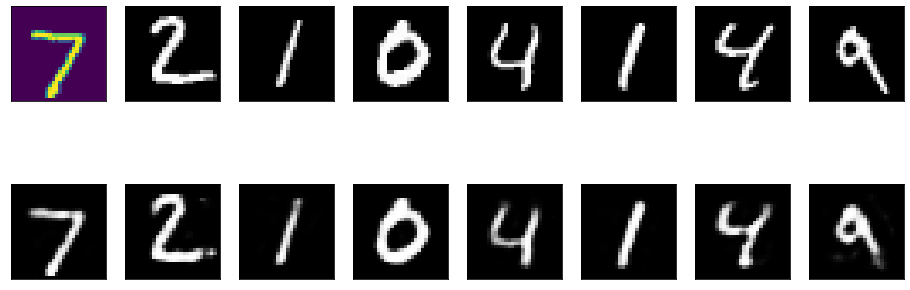

In [9]:
x_batch, y_batch = next(iterator)
x_batch = x_batch.reshape(-1, 784)
reconstruction = autoencoder(x_batch)
plot_images(x_batch, reconstruction.detach())